## Time Series Forecasting with Arima

## Time Series Forecasting means analzing and modeling time seires data to make future  decisions

**ARIMA stands for Auto regressive integrated Moving Average it is an algorithm used for forecasting Time Series Data**

# ARIMA here have three parameters like (p,d,q)
if  d value 0 it having stationary


if d value 1 it having seasonal data

bold text

In [ ]:
##Data collection
## data collection form Google's Stock Price


In [5]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date,timedelta
today =date.today()
d1=today.strftime("%Y-%m-%d")
end_date=d1
d2=date.today()-timedelta(days=365)
d2=d2.strftime("%Y-%m-%d")
start_date=d2

data=yf.download('GOOG',start=start_date,end=end_date,progress=False)
data["Date"]=data.index
data=data[["Date","Open","High","Low","Close","Adj Close","Volume"]]
data.reset_index(drop=True,inplace=True)
print(data.tail())


          Date        Open        High         Low       Close   Adj Close  \
245 2024-05-20  177.309998  179.949997  177.225006  178.460007  178.460007   
246 2024-05-21  178.399994  179.820007  177.309998  179.539993  179.539993   
247 2024-05-22  178.399994  178.852005  176.779999  178.000000  178.000000   
248 2024-05-23  178.779999  179.910004  174.539993  175.059998  175.059998   
249 2024-05-24  176.520004  177.304001  175.199997  176.330002  176.330002   

       Volume  
245  17495100  
246  14706000  
247  16189400  
248  14928400  
249  11400600  


Now lets visualise closing price of Google.

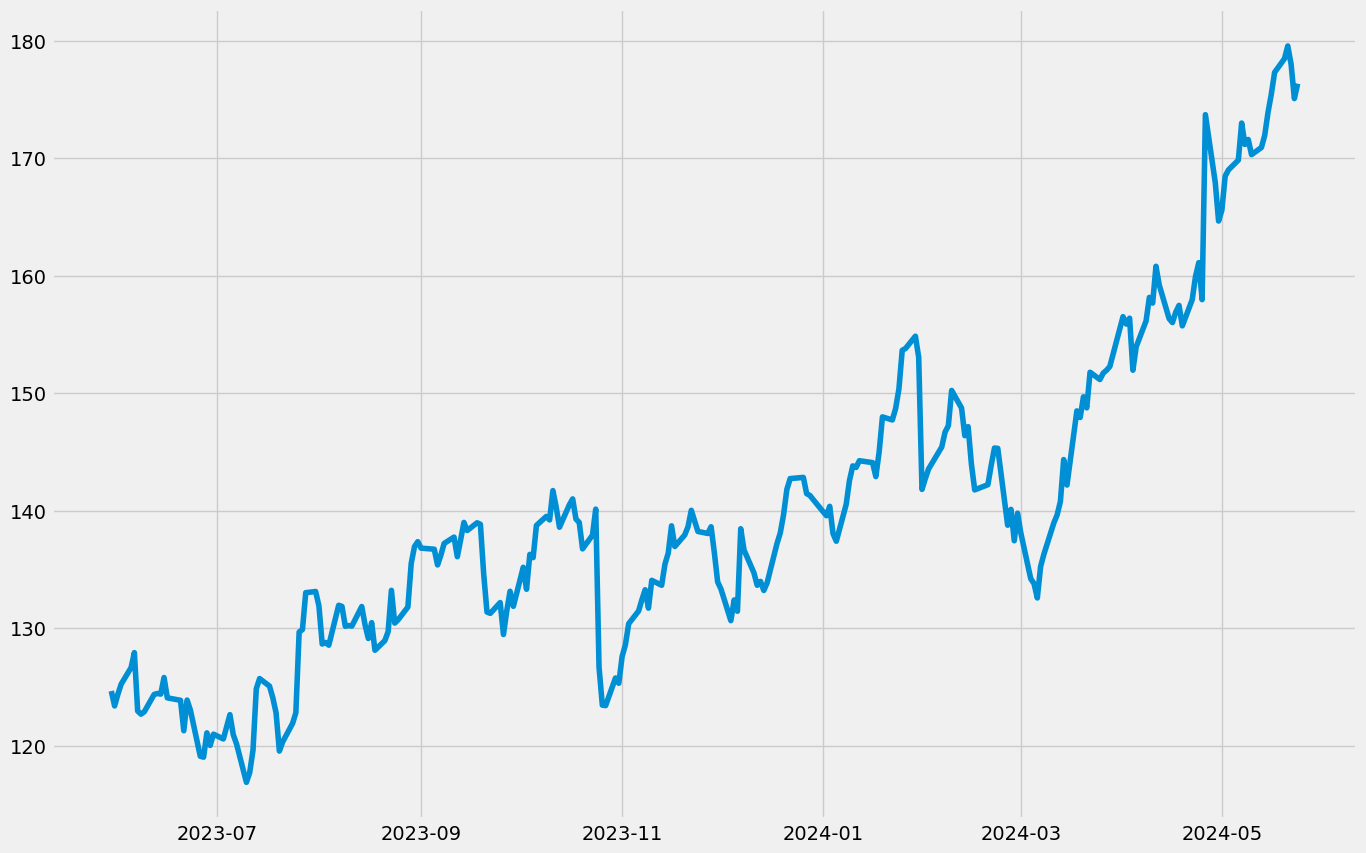

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"],data["Close"])


In [ ]:
##before using  ARIMA model we have out to figure it out our data is stationary or seasonal

In [ ]:
##By observing above data visualization graph shows that dataset is not stationary.

To check whether our dataset is stationary or seasonal properly we can use the **seasonalde composition** method that splits the time series data into trend ,seasonal,residuals for better understanding of time series data


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data["Close"],model="multiplicative")

fig=result.plot()
fig.set_size_inches(15,10)


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

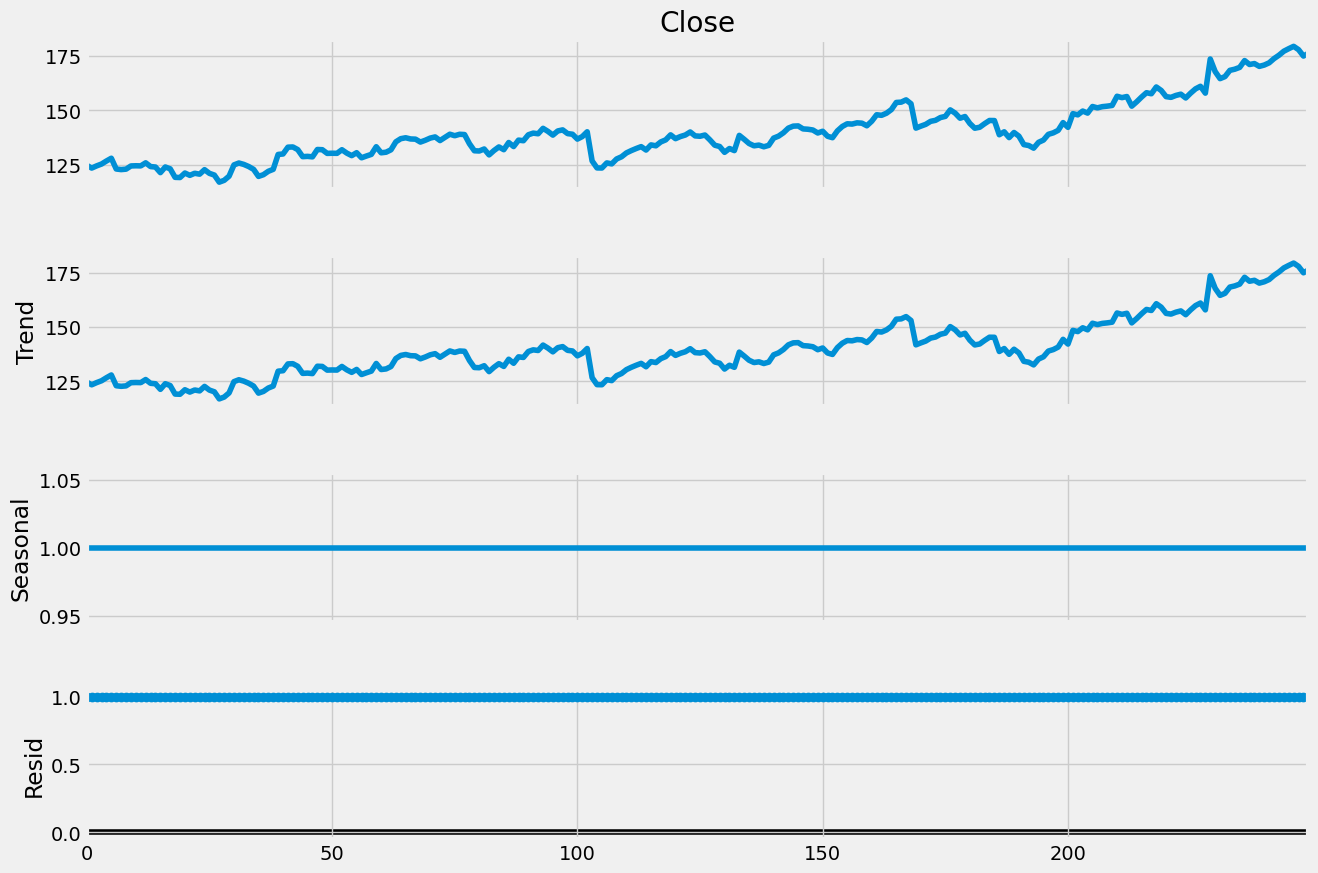

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming the data has a daily frequency
period = 1  # daily

result = seasonal_decompose(data["Close"], model="multiplicative", period=period)

fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

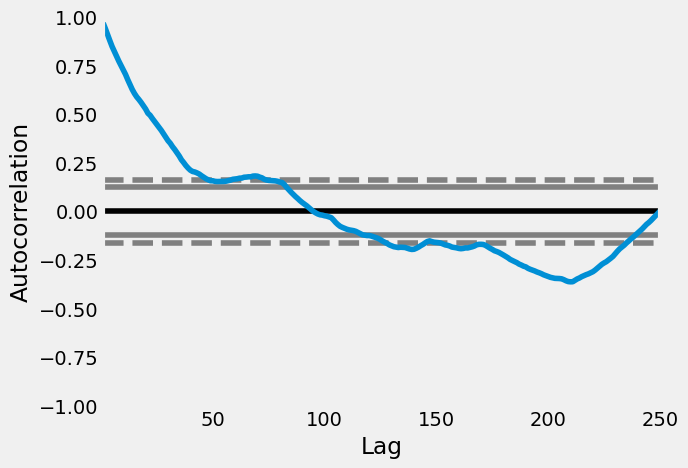

In [10]:
pd.plotting.autocorrelation_plot(data["Close"])

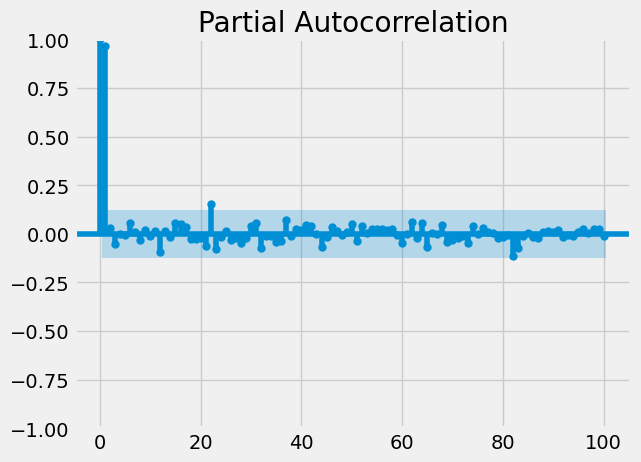

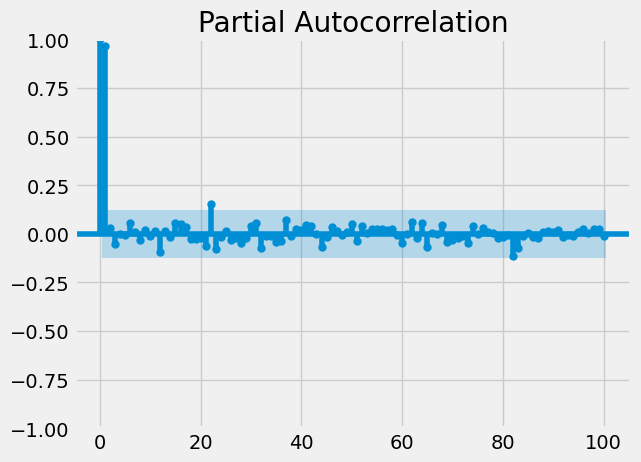

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"],lags=100)

In [12]:
p,d,q=5,1,2


In [15]:
# Import ARIMA from the correct module
from statsmodels.tsa.arima.model import ARIMA

# Create the ARIMA model
model = ARIMA(data["Close"], order=(p, d, q))

# Fit the model
fitted = model.fit()

# Print the model summary
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                 -14.064
Date:                Mon, 27 May 2024   AIC                             44.128
Time:                        12:55:44   BIC                             72.268
Sample:                             0   HQIC                            55.455
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.9995   1.41e-06   2.13e+06      0.000       2.999       2.999
ar.L2         -2.0026   9.86e-07  -2.03e+06      0.000      -2.003      -2.003
ar.L3         -1.9922   1.58e-06  -1.26e+06      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
predictions=fitted.predict()
print(predictions)

0           0.000000
1         249.141176
2          -4.275338
3        -257.992082
4        -637.418545
           ...      
245   -153556.524833
246   -152575.702129
247   -151474.126747
248   -150253.441984
249   -148915.479462
Name: predicted_mean, Length: 250, dtype: float64


<Axes: >

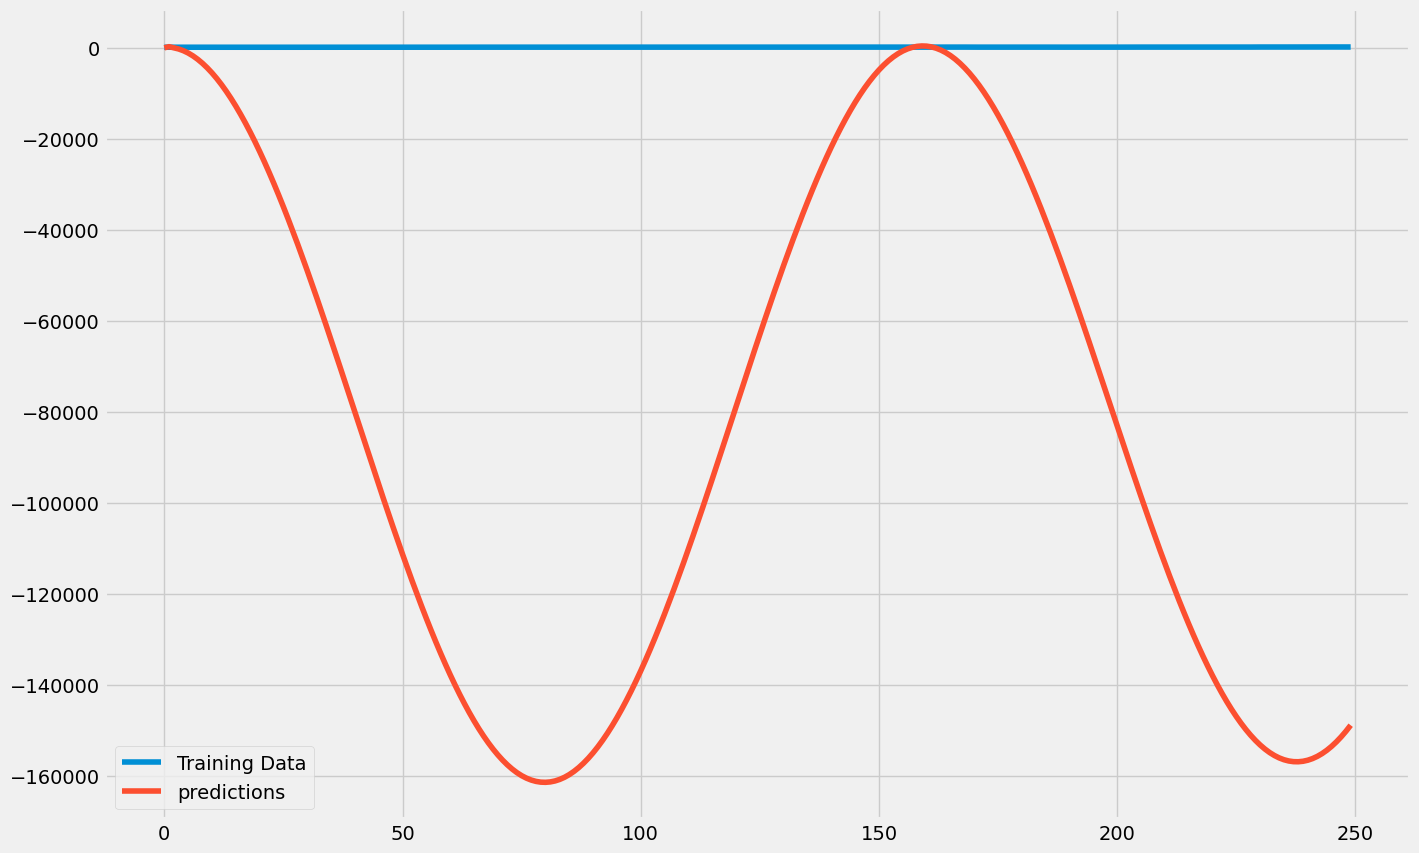

In [18]:
data["Close"].plot(legend=True,label="Training Data",figsize=(15,10))
predictions.plot(legend=True,label="predictions")

In [26]:
import statsmodels.api as sm
import warnings
model =sm.tsa.statespace.SARIMAX(data['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))

In [27]:
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -563.064
Date:                            Mon, 27 May 2024   AIC                           1156.127
Time:                                    13:28:23   BIC                           1208.148
Sample:                                         0   HQIC                          1177.095
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6393      0.106     15.512      0.000       1.432       1.846
ar.L2         -0.7896      0.142   

In [29]:
predictions=model.predict(len(data),len(data)+10)
print(predictions)

250    176.515459
251    178.330211
252    178.271709
253    179.024532
254    178.622786
255    178.613076
256    178.820958
257    178.977473
258    178.034828
259    175.854145
260    176.210882
Name: predicted_mean, dtype: float64


<Axes: >

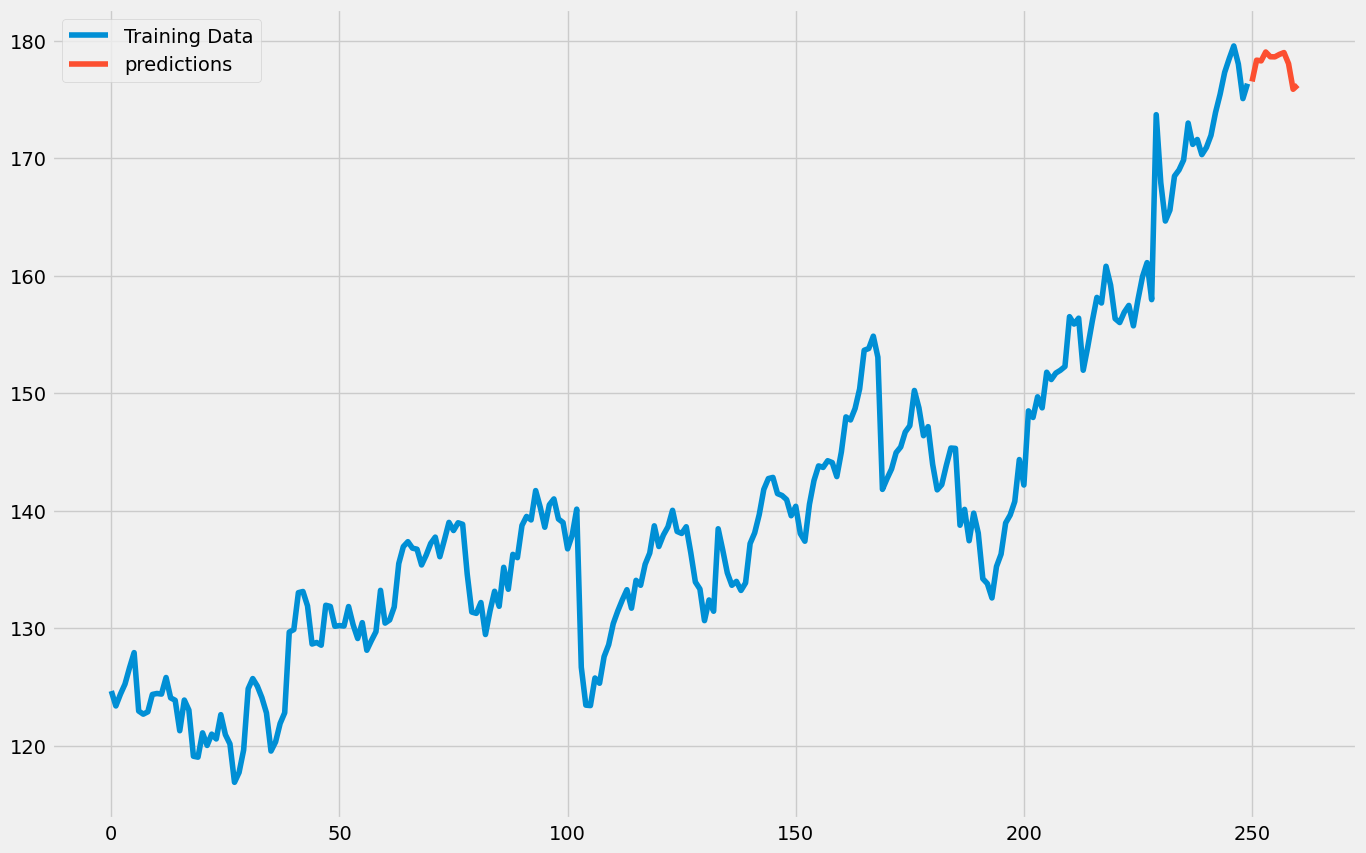

In [30]:
data["Close"].plot(legend=True,label="Training Data",figsize=(15,10))
predictions.plot(legend=True,label="predictions")